# Serial founder events with migration, founder events.

In these simulations, the urban environment was colonized through serial founder events beginning from a single rural population at carrying capcity. We performed simulations under 3 migration rates: 0, 0.01, 0.05. We used 10 fouding proportions: 0.01; 0.02; 0.035; 0.05; 0.075; 0.1; 0.2; 0.5; 0.75; 1.0. The parameter combinations were as follows (all varied parameters crossed factorially, total simulations = 30): 

* Number of simulations: 1000
* Number of generations: 500 (following filling of matrix)
* Max Creation probability: 1.0
* Bottleneck proportion: [0.01; 0.02; 0.035; 0.05; 0.075; 0.1; 0.2; 0.5; 0.75; 1.0]
* pA and pB: 0.5
* Migration rate: [0; 0.01; 0.05]
* Maximum _K_ (rural): 1000
* Minimum _K_ (urban): 1000

In [1]:
library(plyr)
library(ggplot2)
library(data.table)
library(Rmisc)
library(dplyr)

Loading required package: lattice

Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
#Working directory for datasets varying migration rate and bottleneck proportion
setwd('~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Data/summary-datasets/oneFill_Bottlenecks')

#Load datasets that will be used for analyses
datSlopes <- fread('20171106_SlopeSum_Gen_BotMig-Merged_distRev.csv', header = T)
datFreqFirst <- fread('20171106_FreqFirstGen_BotMig-Merged_distRev.csv', header = T)
datSlopes$bot <- as.factor(as.character(datSlopes$bot))
datSlopes$Mig_rate <- as.factor(as.character(datSlopes$Mig_rate))
datFreqFirst$bot <- as.factor(as.character(datFreqFirst$bot))
datFreqFirst$Mig_rate <- as.factor(as.character(datFreqFirst$Mig_rate))

#Data subsets
datSlopes_GenOne <- subset(datSlopes, seq == "1")
datSlopes_NoMig <- subset(datSlopes, Mig_rate == "0")
datSlopes_GenOne_NoMig <- subset(datSlopes, seq == "1" & Mig_rate == "0")
datFreqFirst_StrongBot_NoMig <- subset(datFreqFirst, bot == "0.01" & Mig_rate == "0")
datFreqFirst_InterBot_NoMig <- subset(datFreqFirst, bot == "0.2" & Mig_rate == "0")
datFreqFirst_NoBot_NoMig <- subset(datFreqFirst, bot == "1" & Mig_rate == "0")


#Proportion of simulations with Cyan lost by distance under strong bottlenecks
datPropLost_StrongBot_NoMig <- datFreqFirst_StrongBot_NoMig %>%
    group_by(Distance) %>% 
    summarize(n = n(),
             Lost = sum(Cyan == 0) / n,
             Fixed = sum(Cyan == 1) / n) %>%
    mutate(Founder = "Strong")
datPropLost_StrongBot_NoMig <- dplyr::select(datPropLost_StrongBot_NoMig, Distance, 
                                          Lost, Founder)


#Proportion of simulations with Cyan lost by distance under intermediate bottlenecks
datPropLost_InterBot_NoMig <- datFreqFirst_InterBot_NoMig %>%
    group_by(Distance) %>%
    summarize(n = n(),
             Lost = sum(Cyan == 0) / n,
             Fixed = sum(Cyan == 1) / n) %>%
    mutate(Founder = "Intermediate")
datPropLost_InterBot_NoMig <- dplyr::select(datPropLost_InterBot_NoMig, Distance, 
                                          Lost, Founder)

#Proportion of simulations with Cyan lost by distance under no bottlenecks
datPropLost_NoBot_NoMig <- datFreqFirst_NoBot_NoMig %>%
    group_by(Distance) %>%
    summarize(n = n(),
             Lost = sum(Cyan == 0) / n,
             Fixed = sum(Cyan == 1) / n) %>%
    mutate(Founder = "None")
datPropLost_NoBot_NoMig <- dplyr::select(datPropLost_NoBot_NoMig, Distance, 
                                          Lost, Founder)

# Merge datasets from strong and intermediate bottlenecks above
datPropLost_merged <- rbind(datPropLost_StrongBot_NoMig, datPropLost_InterBot_NoMig, datPropLost_NoBot_NoMig)

# Calculate mean frequency in first generation across simulations for each distance
MeanFreqFirstGen_Distance <- datFreqFirst %>%
    group_by(Distance, bot, Mig_rate) %>%
    summarize(Freq = mean(Cyan))

MeanFreqFirstGen_Distance_StrongBot_NoMig <- subset(MeanFreqFirstGen_Distance, bot == "0.01" & Mig_rate == "0")
MeanFreqFirstGen_Distance_InterBot_NoMig <- subset(MeanFreqFirstGen_Distance, bot == "0.2" & Mig_rate == "0")
MeanFreqFirstGen_Distance_NoBot_NoMig <- subset(MeanFreqFirstGen_Distance, bot == "1" & Mig_rate == "0")

# Dataset used for determining mean number of generations to fillings and Number of generations to K upoin filling
datPopSize <- fread('20180313_PopSize_oneFill_Bottlenecks.csv', header = T)


Read 15000000 rows and 7 (of 7) columns from 0.381 GB file in 00:00:06


In [11]:
#Themes used for plotting
ng1=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=15),
          axis.text.y=element_text(size=15),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

ng1.45=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=15,angle=45,hjust=1),
          axis.text.y=element_text(size=15),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

bot,meanGen,n,sd,se,ci
0.010,409.155,1000,12.017046,0.3800123,0.7448242
0.025,348.789,1000,8.930747,0.2824150,0.5535334
0.035,325.038,1000,8.040722,0.2542700,0.4983691
0.050,297.451,1000,6.580950,0.2081079,0.4078915
0.075,264.489,1000,6.328976,0.2001398,0.3922740
0.100,240.405,1000,5.842012,0.1847406,0.3620917
0.200,179.743,1000,5.292538,0.1673648,0.3280349
0.500,98.122,1000,4.847950,0.1533056,0.3004791
0.750,62.652,1000,3.798859,0.1201305,0.2354557
1.000,40.000,1000,0.000000,0.0000000,0.0000000


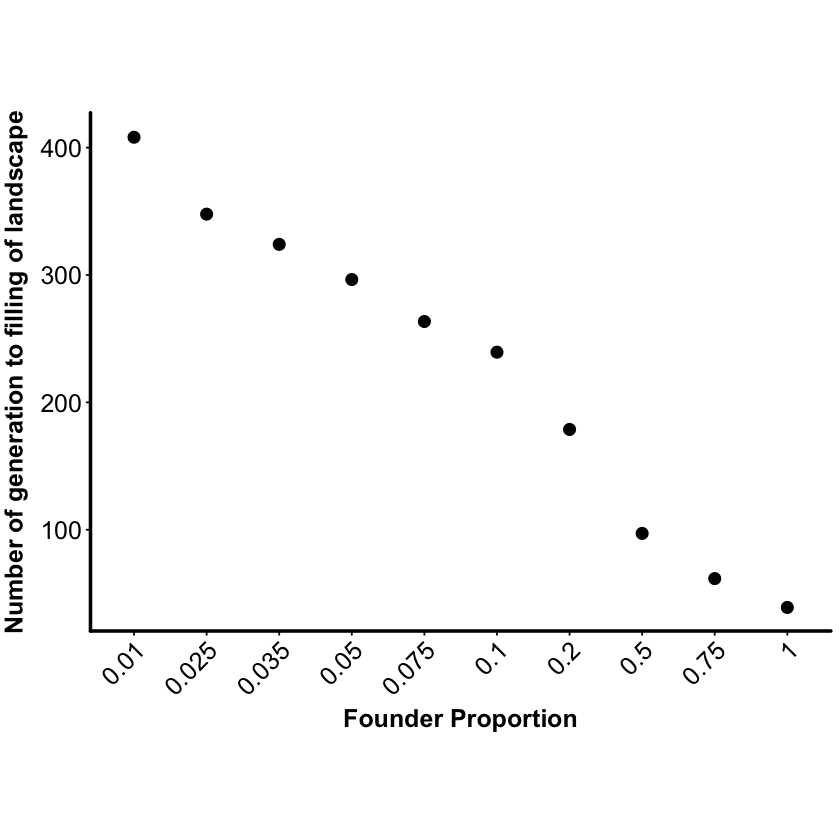

In [42]:
datNumGen <- 
    datPopSize %>% 
    filter(Mig_rate == 0 & seq == 1) %>% 
    group_by(bot) %>% 
    summarize(meanGen = mean(Generation), 
             n = n(), 
             sd = sd(Generation), 
             se = sd / sqrt(n), 
             ci = 1.96 * se)
datNumGen
NumGen_bot <- ggplot(datNumGen, aes(x = factor(bot), y = meanGen - 1)) + 
    geom_errorbar(aes(ymin = (meanGen - 1) - ci, ymax = (meanGen - 1) + ci), width=0.15, size=0.7) +
    geom_point(size = 3) + 
#     geom_line(size = 1, aes(linetype = Mig_rate), position = position_dodge(width = 0.5)) +  
    ylab("Number of generation to filling of landscape") + xlab("Founder Proportion") + ng1.45
NumGen_bot

bot,meanGen,n,sd,se,ci
0.010,31.348,1000,1.2281712,0.03883818,0.07612284
0.025,29.729,1000,1.7557453,0.05552154,0.10882222
0.035,28.877,1000,1.7717252,0.05602687,0.10981266
0.050,28.206,1000,1.9228264,0.06080511,0.11917801
0.075,27.058,1000,1.8248194,0.05770586,0.11310348
0.100,26.355,1000,1.8768318,0.05935063,0.11632724
0.200,24.316,1000,1.6348752,0.05169929,0.10133061
0.500,20.573,1000,1.1357645,0.03591603,0.07039541
0.750,17.578,1000,0.7283175,0.02303142,0.04514159
1.000,1.000,1000,0.0000000,0.00000000,0.00000000


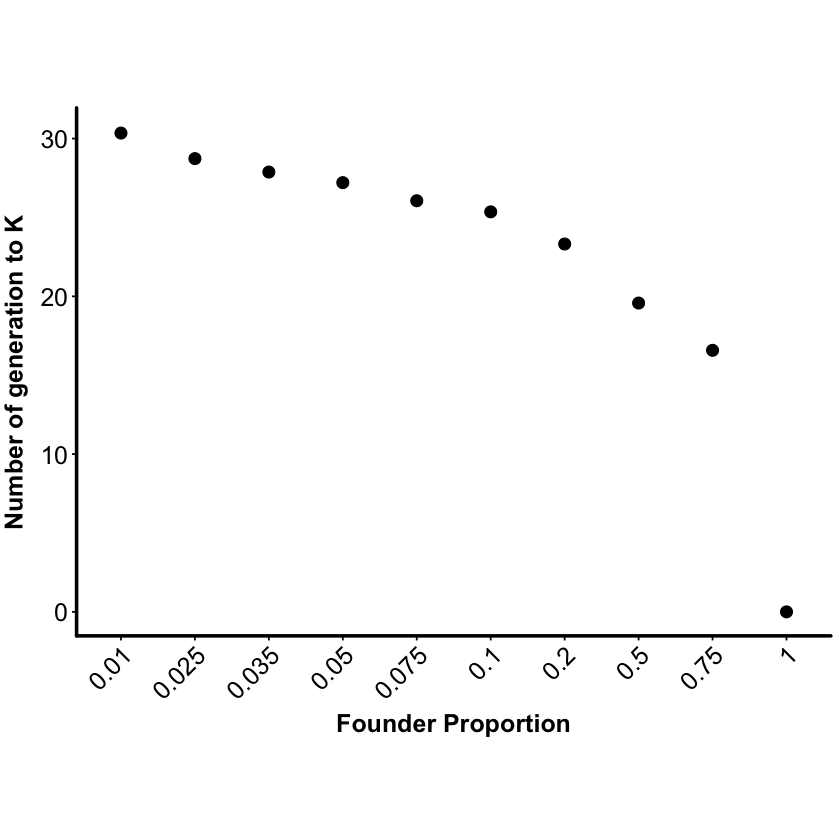

In [43]:
datGenK <- 
    datPopSize %>% 
    filter(Mig_rate == 0) %>% 
    group_by(Sim, bot) %>% 
    slice(which.max(Pop_size)) %>%
    group_by(bot) %>%
    summarize(meanGen = mean(seq), 
             n = n(), 
             sd = sd(seq), 
             se = sd / sqrt(n), 
             ci = 1.96 * se)  
datGenK
NumGenK_bot <- ggplot(datGenK, aes(x = factor(bot), y = meanGen - 1)) + 
    geom_errorbar(aes(ymin = (meanGen - 1) - ci, ymax = (meanGen - 1) + ci), width=0.15, size=0.7) +
    geom_point(size = 3) + 
#     geom_line(size = 1, aes(linetype = Mig_rate), position = position_dodge(width = 0.5)) +  
    ylab("Number of generation to K") + xlab("Founder Proportion") + ng1.45
NumGenK_bot

In [12]:
RegSummary <- fread('20171106_FitSimCoef_BotMig-Merged_distRev.csv')

# Mean of significant slopes
MeansProps_NoMig_GenOne_SigOnly <- RegSummary %>%
    group_by(Sim, Mig_rate, bot) %>%
    mutate(seq = 1:n()) %>%
    filter(seq == 1 & p.value < 0.05 & estimate > 0) %>%
    group_by(Mig_rate, bot) %>%
    summarize(mean_SigSlope = mean(estimate), 
              sd_SigSlope = sd(estimate),
              n = length(estimate),
              se_SigSlope = sd_SigSlope / sqrt(n), 
              ci_SigSlope = 1.96 * se_SigSlope)

## Mean slope with founder proportion under varying migration rates

Here I look at the mean slope across simulations under varying founding proportions and migration rates. Mean slope is calculated in the first generation following the filling of the landscape matrix. I also plot the change in the mean slope with increasing generations. 

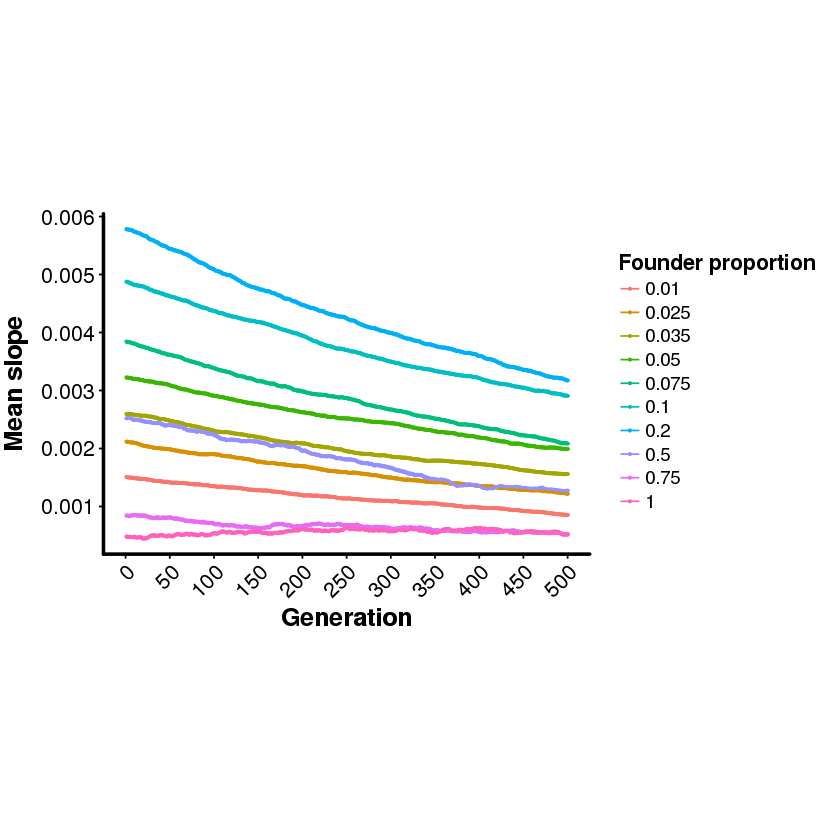

In [18]:
MeanSlope_Cyan_byGen <- ggplot(datSlopes_NoMig, aes(x = seq, y = mean, group = bot, color = bot)) + 
    ylab("Mean slope") + xlab("Generation") + geom_point(size = 0.5, aes(color = bot)) +
    geom_line(size = 0.5, aes(color = bot)) + 
    coord_cartesian(xlim = c(0, 500)) + scale_x_continuous(breaks = seq(from = 0, to = 500, by = 50)) + 
    labs(color = "Founder proportion") + ng1.45
MeanSlope_Cyan_byGen 

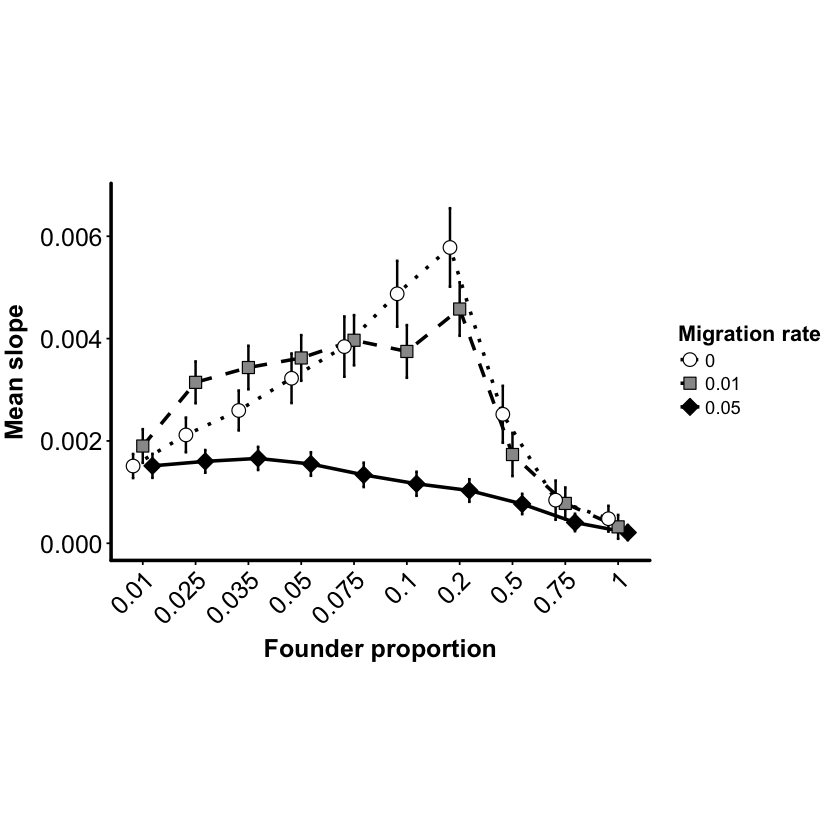

In [58]:
MeanSlope_BotMig <- ggplot(datSlopes_GenOne, aes(x = bot, y = mean, group = Mig_rate)) + 
    geom_errorbar(aes(ymin = mean - ci_mean, ymax = mean + ci_mean), width=0.15, size=0.7,
    position = position_dodge(width = 0.55)) +
    geom_line(size = 1, aes(linetype = Mig_rate), position = position_dodge(width = 0.55)) +
    geom_point(size = 3.5, aes(fill = Mig_rate, shape = Mig_rate), position = position_dodge(width = 0.55)) + 
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
    coord_cartesian(ylim = c(0, 0.0067)) + scale_y_continuous(breaks = seq(from = 0, to = 0.006, by = 0.002)) +
    ylab("Mean slope") + xlab("Founder proportion") + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
MeanSlope_BotMig

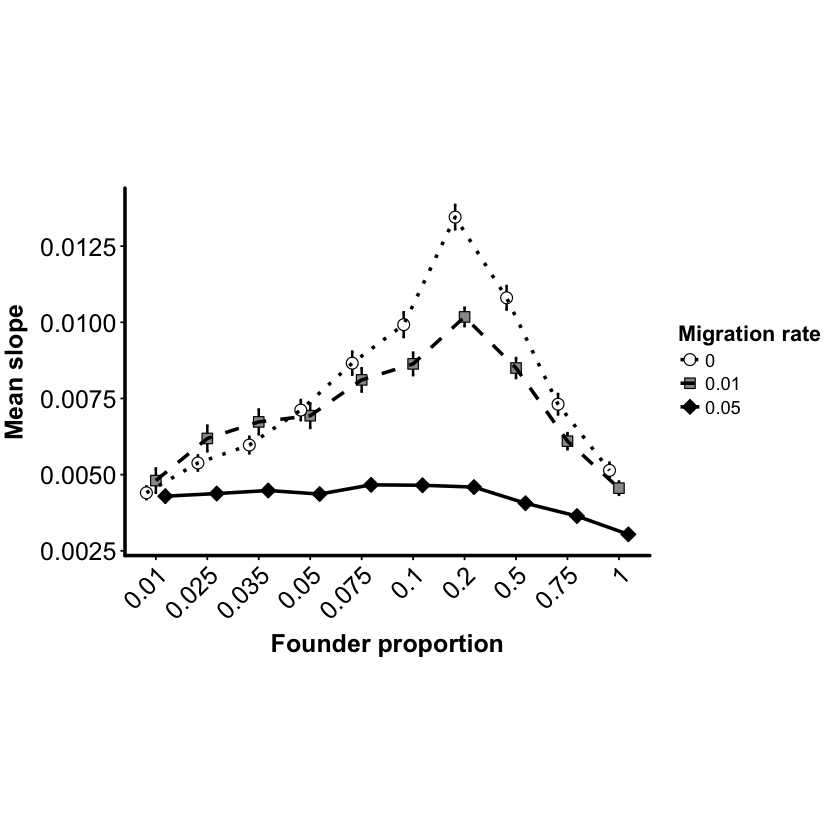

In [14]:
MeanSlope_BotMig_SigOnly <- ggplot(MeansProps_NoMig_GenOne_SigOnly, aes(x = factor(bot), y = mean_SigSlope, group = factor(Mig_rate))) + 
    geom_errorbar(aes(ymin = mean_SigSlope - ci_SigSlope, ymax = mean_SigSlope + ci_SigSlope), width=0.15, size=0.7,
    position = position_dodge(width = 0.55)) +
    geom_point(size = 3, aes(fill = factor(Mig_rate), shape = factor(Mig_rate)), position = position_dodge(width = 0.55)) + 
    geom_line(size = 1, aes(linetype = factor(Mig_rate)), position = position_dodge(width = 0.55)) +
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
#     coord_cartesian(ylim = c(0, 0.007)) + scale_y_continuous(breaks = seq(from = 0, to = 0.006, by = 0.002)) +
    ylab("Mean slope") + xlab("Founder proportion") + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
MeanSlope_BotMig_SigOnly

## Effects of founder events and migration on proportion of negative and positive clines

Here I look at how founder effects and migration affect the proportion of significantly negative and positive clines in the _Ac_ and _Li_ alleles and in HCN clines. 

**Positive clines**: Less HCN in urban environment (i.e. loss of HCN across space)  
**Negative clines**: More HCN in urban environment (i.e. gain in HCN across space)

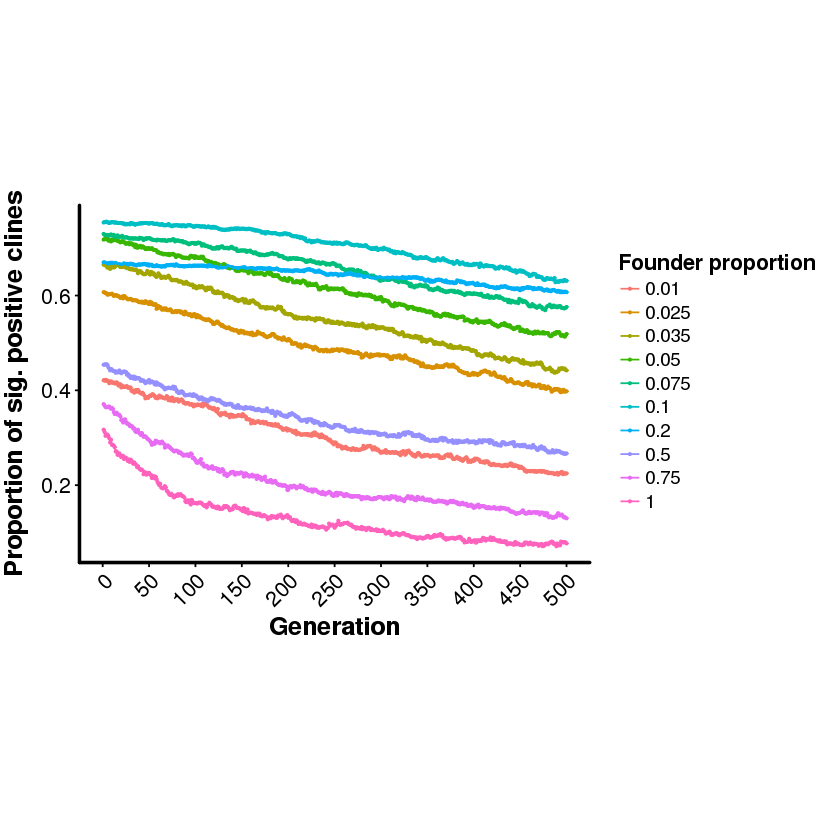

In [21]:
PropSigPos_Cyan_byGen <- ggplot(datSlopes_NoMig, aes(x = seq, y = prop_sigPos, group = bot, color = bot)) + 
    ylab("Proportion of sig. positive clines") + xlab("Generation") + geom_point(size = 0.5, aes(color = bot)) +
    geom_line(size = 0.5, aes(color = bot)) + 
    coord_cartesian(xlim = c(0, 500)) + scale_x_continuous(breaks = seq(from = 0, to = 500, by = 50)) + 
    labs(color = "Founder proportion") + ng1.45
PropSigPos_Cyan_byGen 

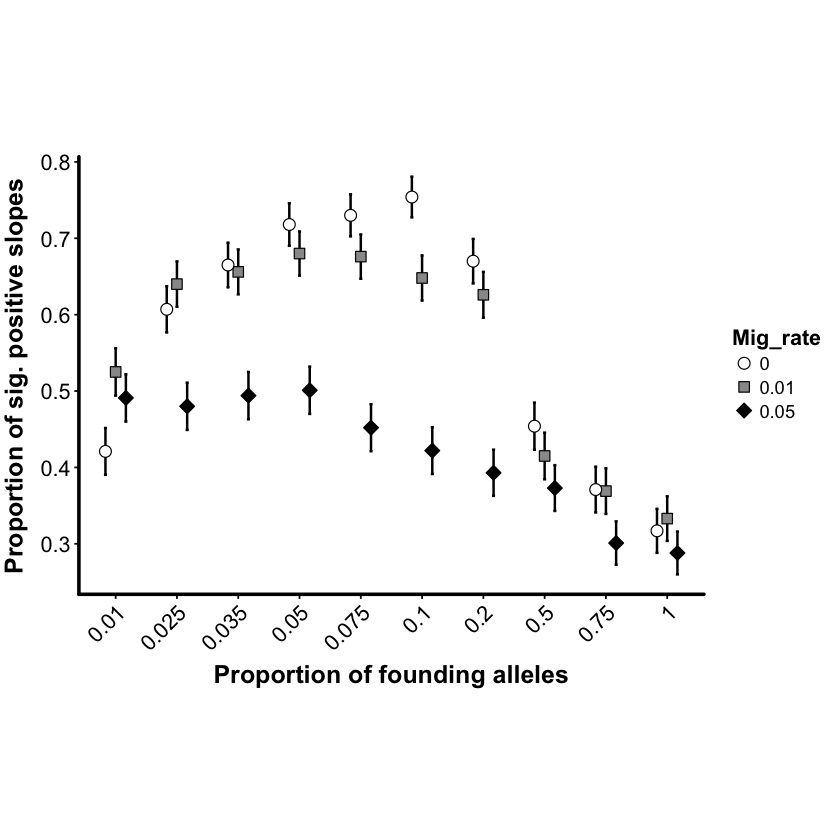

In [6]:
PropSigPos_BotMig <- ggplot(datSlopes_GenOne, aes(x = bot, y = prop_sigPos, group = Mig_rate)) + 
    geom_errorbar(aes(ymin = prop_sigPos - ci_sigPos, ymax = prop_sigPos + ci_sigPos), width=0.15, size=0.7,
    position = position_dodge(width = 0.5)) +
    geom_point(size = 3, aes(fill = Mig_rate, shape = Mig_rate), position = position_dodge(width = 0.5)) + 
#     geom_line(size = 1, aes(linetype = Mig_rate), position = position_dodge(width = 0.5)) +
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +    
    ylab("Proportion of sig. positive slopes") + xlab("Proportion of founding alleles") + ng1.45
PropSigPos_BotMig

## Dynamics of HCN frequency change during colonization

Here I try to understand the hump-shaped distribution above by exploring how the frequency of HCN changes during the colonization process. 

In [11]:
datPropLost_merged$Founder

[1] "Strong"       "Strong"       "Strong"       "Strong"       "Strong"      
  [6] "Strong"       "Strong"       "Strong"       "Strong"       "Strong"      
 [11] "Strong"       "Strong"       "Strong"       "Strong"       "Strong"      
 [16] "Strong"       "Strong"       "Strong"       "Strong"       "Strong"      
 [21] "Strong"       "Strong"       "Strong"       "Strong"       "Strong"      
 [26] "Strong"       "Strong"       "Strong"       "Strong"       "Strong"      
 [31] "Strong"       "Strong"       "Strong"       "Strong"       "Strong"      
 [36] "Strong"       "Strong"       "Strong"       "Strong"       "Strong"      
 [41] "Intermediate" "Intermediate" "Intermediate" "Intermediate" "Intermediate"
 [46] "Intermediate" "Intermediate" "Intermediate" "Intermediate" "Intermediate"
 [51] "Intermediate" "Intermediate" "Intermediate" "Intermediate" "Intermediate"
 [56] "Intermediate" "Intermediate" "Intermediate" "Intermediate" "Intermediate"
 [61] "Intermediate" "Intermediate" "Intermediate" "Intermediate" "Intermediate"
 [66] "Intermediate" "Intermediate" "Intermediate" "Intermediate" "Intermediate"
 [71] "Intermediate" "Intermediate" "Intermediate" "Intermediate" "Intermediate"
 [76] "Intermediate" "Intermediate" "Intermediate" "Intermediate" "Intermediate"
 [81] "None"         "None"         "None"         "None"         "None"        
 [86] "None"         "None"         "None"         "None"         "None"        
 [91] "None"         "None"         "None"         "None"         "None"        
 [96] "None"         "None"         "None"         "None"         "None"        
[101] "None"         "None"         "None"         "None"         "None"        
[106] "None"         "None"         "None"         "None"         "None"        
[111] "None"         "None"         "None"         "None"         "None"        
[116] "None"         "None"         "None"         "None"         "None"

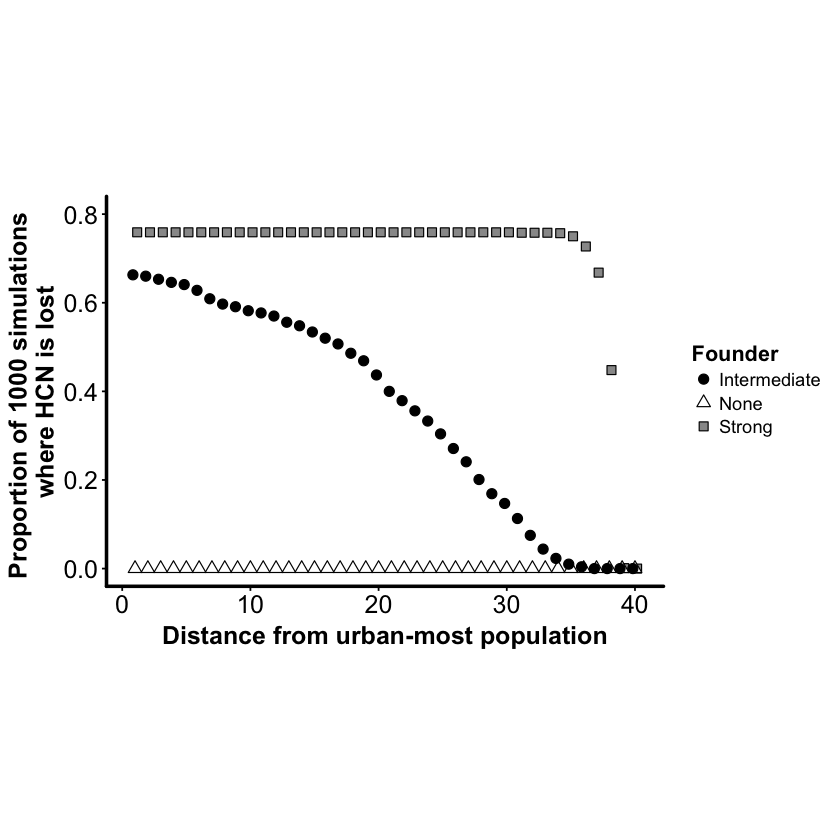

In [35]:
propLost_bot_NoMig <- ggplot(datPropLost_merged, aes(x = Distance, y = Lost, group = Founder, shape = Founder, fill = Founder)) + 
    geom_point(size = 2.5, position = position_dodge(width = 0.5)) +
#     geom_line(size = 0.75, aes(linetype = Founder)) +
    ylab("Proportion of 1000 simulations 
where HCN is lost") + xlab("Distance from urban-most population") +
    scale_shape_manual(labels = c("Intermediate", "None", "Strong"), values = c(21, 24, 22)) +
    scale_fill_manual(labels = c("Intermediate", "None", "Strong"), values = c("black", "white", "grey60")) +
    coord_cartesian(ylim = c(0, 0.8)) + scale_y_continuous(breaks = seq(from = 0, to = 0.8, by = 0.2))  + ng1
propLost_bot_NoMig

In [72]:
lm_FreqFirstGen_StrongBot_NoMig <- lm(Freq ~ Distance, data = MeanFreqFirstGen_Distance_StrongBot_NoMig)
summary(lm_FreqFirstGen_StrongBot_NoMig)


Call:
lm(formula = Freq ~ Distance, data = MeanFreqFirstGen_Distance_StrongBot_NoMig)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05468 -0.03498 -0.01131  0.01506  0.24982 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.2049757  0.0196579  10.427 1.05e-12 ***
Distance    0.0027050  0.0008356   3.237   0.0025 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.061 on 38 degrees of freedom
Multiple R-squared:  0.2162,	Adjusted R-squared:  0.1956 
F-statistic: 10.48 on 1 and 38 DF,  p-value: 0.002504


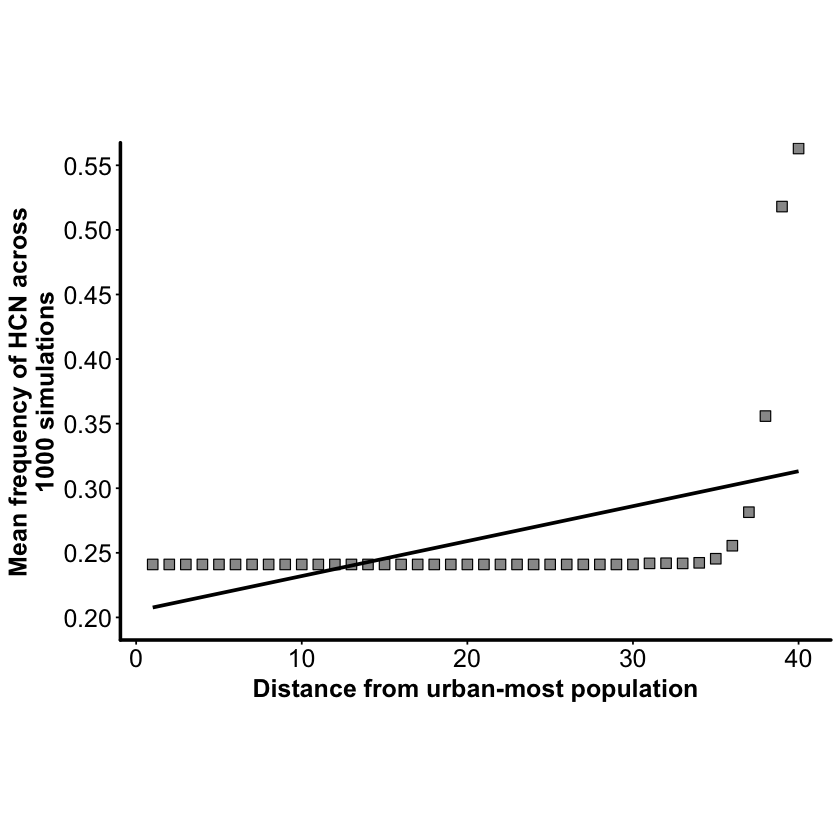

In [6]:
FreqFirstGen_StrongBot_NoMig <- ggplot(MeanFreqFirstGen_Distance_StrongBot_NoMig, aes(x = Distance, y = Freq)) + 
    geom_point(size = 3, shape = 22, fill = "grey60") +
    geom_smooth(method = "lm", se = F, colour = "black", size = 1.05) +
    ylab("Mean frequency of HCN across
1000 simulations") + xlab("Distance from urban-most population") + 
    coord_cartesian(ylim = c(0.2, 0.55)) + scale_y_continuous(breaks = seq(from = 0.2, to = 0.55, by = 0.05)) + ng1
FreqFirstGen_StrongBot_NoMig

In [76]:
lm_FreqFirstGen_InterBot_NoMig <- lm(Freq ~ Distance, data = MeanFreqFirstGen_Distance_InterBot_NoMig)
summary(lm_FreqFirstGen_InterBot_NoMig)


Call:
lm(formula = Freq ~ Distance, data = MeanFreqFirstGen_Distance_InterBot_NoMig)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028870 -0.021871 -0.007804  0.019546  0.041450 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.2362970  0.0074957   31.52   <2e-16 ***
Distance    0.0073500  0.0003186   23.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02326 on 38 degrees of freedom
Multiple R-squared:  0.9334,	Adjusted R-squared:  0.9316 
F-statistic: 532.2 on 1 and 38 DF,  p-value: < 2.2e-16


In [26]:
MeanFreqFirstGen_Distance_InterBot_NoMig

Distance,bot,Mig_rate,Freq
1,0.2,0,0.285097
2,0.2,0,0.287314
3,0.2,0,0.289726
4,0.2,0,0.291987
5,0.2,0,0.295299
6,0.2,0,0.295735
7,0.2,0,0.299365
8,0.2,0,0.302140
9,0.2,0,0.306787
10,0.2,0,0.309249


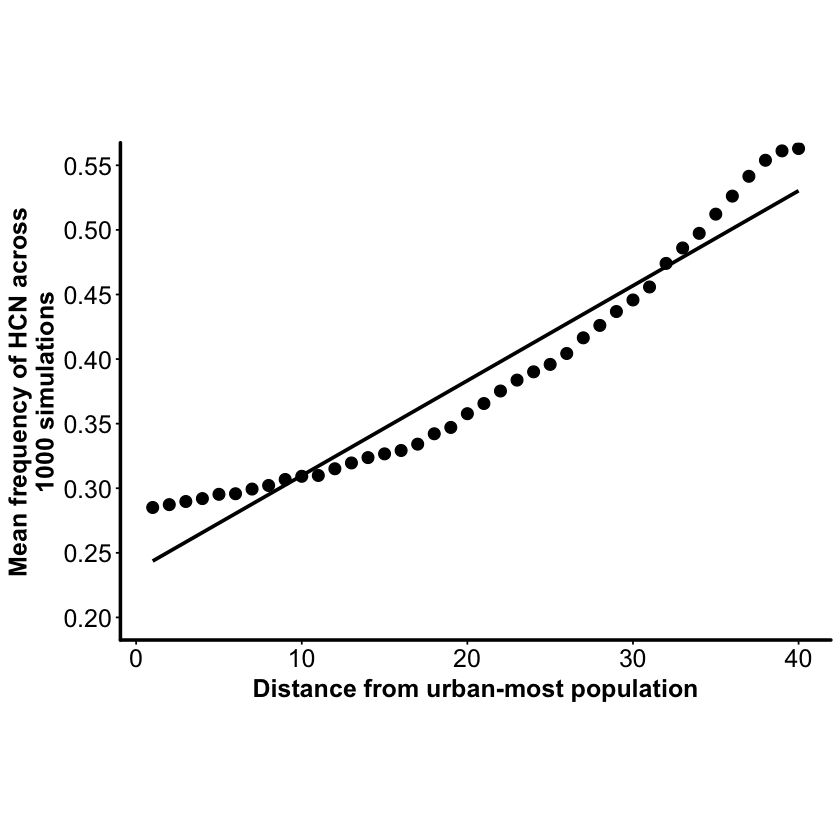

In [7]:
FreqFirstGen_InterBot_NoMig <- ggplot(MeanFreqFirstGen_Distance_InterBot_NoMig, aes(x = Distance, y = Freq)) + 
    geom_point(size = 3) +
    geom_smooth(method = "lm", se = F, colour = "black", size = 1.05) +
    ylab("Mean frequency of HCN across
1000 simulations") + xlab("Distance from urban-most population") + 
    coord_cartesian(ylim = c(0.2, 0.55)) + scale_y_continuous(breaks = seq(from = 0.2, to = 0.55, by = 0.05)) + ng1
FreqFirstGen_InterBot_NoMig

In [78]:
lm_FreqFirstGen_NoBot_NoMig <- lm(Freq ~ Distance, data = MeanFreqFirstGen_Distance_NoBot_NoMig)
summary(lm_FreqFirstGen_NoBot_NoMig)


Call:
lm(formula = Freq ~ Distance, data = MeanFreqFirstGen_Distance_NoBot_NoMig)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.333e-03 -1.134e-03 -6.130e-06  9.098e-04  2.859e-03 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.5254653  0.0004212 1247.42   <2e-16 ***
Distance    0.0009125  0.0000179   50.96   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.001307 on 38 degrees of freedom
Multiple R-squared:  0.9856,	Adjusted R-squared:  0.9852 
F-statistic:  2597 on 1 and 38 DF,  p-value: < 2.2e-16


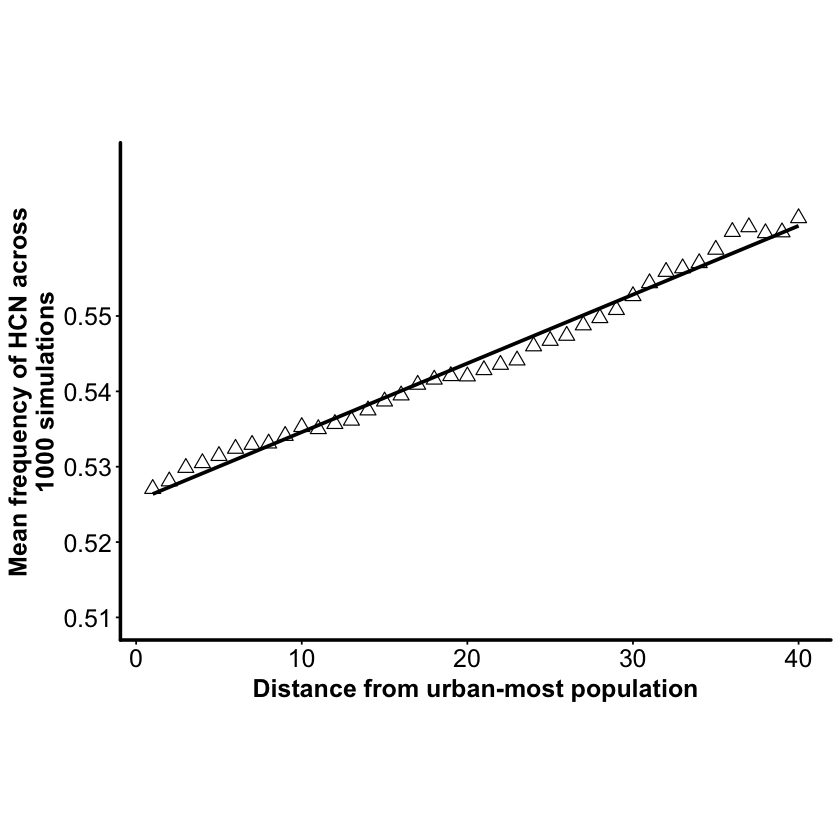

In [19]:
FreqFirstGen_NoBot_NoMig <- ggplot(MeanFreqFirstGen_Distance_NoBot_NoMig, aes(x = Distance, y = Freq)) + 
    geom_point(size = 3, shape = 24, fill = "white") +
    geom_smooth(method = "lm", se = F, colour = "black", size = 1.05) +
    ylab("Mean frequency of HCN across
1000 simulations") + xlab("Distance from urban-most population") + 
    coord_cartesian(ylim = c(0.51, 0.57)) + scale_y_continuous(breaks = seq(from = 0.51, to = 0.55, by = 0.01)) + ng1
FreqFirstGen_NoBot_NoMig 

In [27]:
MeanFreqFirstGen_Distance_Bot_NoMig <- rbind(MeanFreqFirstGen_Distance_NoBot_NoMig, 
                                             MeanFreqFirstGen_Distance_InterBot_NoMig, 
                                             MeanFreqFirstGen_Distance_StrongBot_NoMig)
MeanFreqFirstGen_Distance_Bot_NoMig

Distance,bot,Mig_rate,Freq
1,1,0,0.527070
2,1,0,0.528071
3,1,0,0.529861
4,1,0,0.530495
5,1,0,0.531440
6,1,0,0.532398
7,1,0,0.532918
8,1,0,0.533099
9,1,0,0.534109
10,1,0,0.535282


In [29]:
levels(MeanFreqFirstGen_Distance_Bot_NoMig$bot)

[1] "0.01"  "0.025" "0.035" "0.05"  "0.075" "0.1"   "0.2"   "0.5"   "0.75" 
[10] "1"

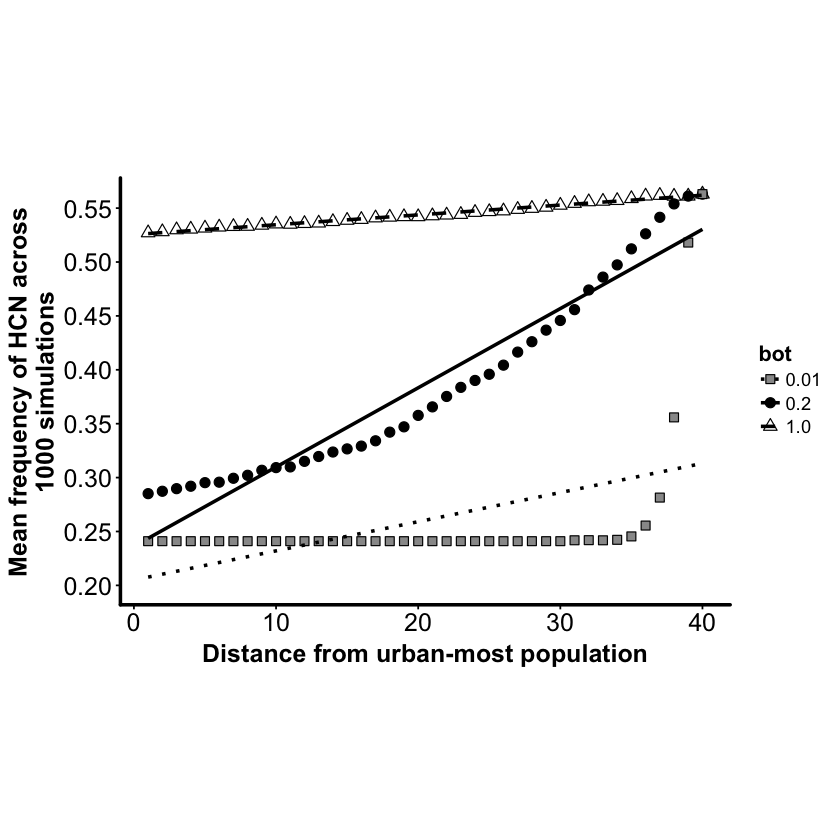

In [56]:
FreqFirstGen_Bot_NoMig <- ggplot(MeanFreqFirstGen_Distance_Bot_NoMig, aes(x = Distance, y = Freq, group = bot)) + 
#     geom_smooth(method = "lm", aes(linetype = bot), se = F, colour = "black", size = 1.0) +
    geom_point(size = 2.5, aes(shape = bot, fill = bot)) +
    geom_smooth(method = "lm", aes(linetype = bot), se = F, colour = "black", size = 1.0) +
    ylab("Mean frequency of HCN across
1000 simulations") + xlab("Distance from urban-most population") + 
    scale_shape_manual(labels = c("0.01", "0.2", "1.0"), values = c(22, 21, 24)) +
    scale_fill_manual(labels = c("0.01", "0.2", "1.0"), values = c("grey60", "black", "white")) +
    scale_linetype_manual(labels = c("0.01", "0.2", "1.0"), values = c("dotted", "solid", "dashed")) +
    coord_cartesian(ylim = c(0.2, 0.56)) + scale_y_continuous(breaks = seq(from = 0.2, to = 0.55, by = 0.05)) + ng1
FreqFirstGen_Bot_NoMig

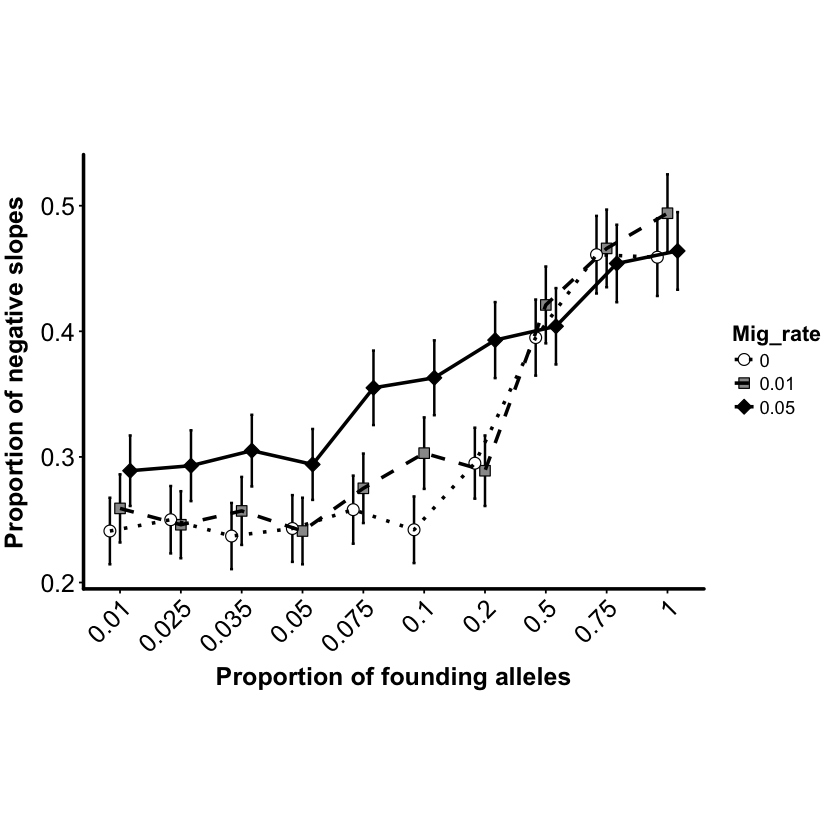

In [50]:
PropNeg_BotMig <- ggplot(datSlopes_GenOne, aes(x = bot, y = prop_neg, group = Mig_rate)) + 
    geom_errorbar(aes(ymin = prop_neg - ci_neg, ymax = prop_neg + ci_neg), width=0.15, size=0.7,
    position = position_dodge(width = 0.5)) +
    geom_point(size = 3, aes(fill = Mig_rate, shape = Mig_rate), position = position_dodge(width = 0.5)) + 
    geom_line(size = 1, aes(linetype = Mig_rate), position = position_dodge(width = 0.5)) +
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +    
    ylab("Proportion of negative slopes") + xlab("Proportion of founding alleles") + ng1.45
PropNeg_BotMig + ng1.45

In [134]:
#Extra columns that will be used to create melting dataset for plotting proportion of positive and negative slopes
SlopeSum_Melt_NoMig <- dplyr::select(datSlopes_GenOne_NoMig, bot, prop_sigPos, ci_sigPos, prop_sigNeg,
  ci_sigNeg)

#Melt dataframe
dm1 <- melt(datSlopes_GenOne_NoMig[,c("bot", "prop_sigPos", "ci_sigPos")], 
            id=c("bot", "ci_sigPos"))
dm2 <- melt(datSlopes_GenOne_NoMig[,c("bot", "prop_sigNeg", "ci_sigNeg")], 
            id=c("bot", "ci_sigNeg"))

#Rename columns
setnames(dm1, old = "ci_sigPos", new = "ci")
setnames(dm2, old = "ci_sigNeg", new = "ci")

#Merge melted dataframes
SlopeSum_Melt_NoMig <- rbind(dm1, dm2)
SlopeSum_Melt_NoMig

bot,ci,variable,value
0.01,0.03060106,prop_sigPos,0.421
0.025,0.03027239,prop_sigPos,0.607
0.035,0.02925427,prop_sigPos,0.665
0.05,0.02788964,prop_sigPos,0.718
0.075,0.02751689,prop_sigPos,0.730
0.1,0.02669373,prop_sigPos,0.754
0.2,0.02914409,prop_sigPos,0.670
0.5,0.03085889,prop_sigPos,0.454
0.75,0.02994114,prop_sigPos,0.371
1,0.02884005,prop_sigPos,0.317


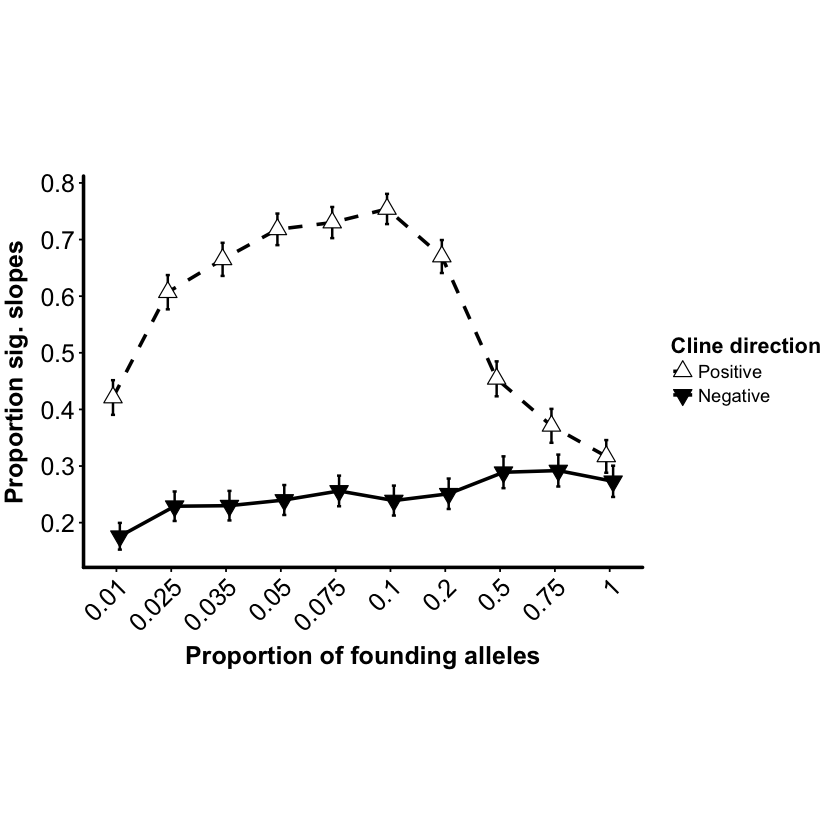

In [139]:
#Plot proportion of significant slopes by migration rate
PropSig_Bot_NoMig <- ggplot(SlopeSum_Melt_NoMig, aes(x = factor(bot), y = value, 
    shape = variable, fill = variable, group = variable)) + 
    geom_errorbar(aes(ymin = value - ci, ymax = value + ci), width=0.15, size = 0.7, 
    position = position_dodge(width = 0.25)) +
    ylab("Proportion sig. slopes") + xlab("Proportion of founding alleles") + 
    geom_line(size = 1, aes(linetype = variable), position = position_dodge(width = 0.25)) + 
    geom_point(size = 3.5, color = "black", position = position_dodge(width = 0.25)) +
    scale_linetype_manual(labels = c("Positive", "Negative"), values = c("dashed", "solid")) +
    scale_shape_manual(labels = c("Positive", "Negative"),values=c(24, 25))+
    scale_fill_manual(labels = c("Positive", "Negative"),values=c("white", "black")) +
    scale_y_continuous(breaks = seq(from = 0, to = 1.0, by = 0.10)) +
    labs(shape = 'Cline direction', fill = 'Cline direction', linetype = 'Cline direction') + ng1.45
PropSig_Bot_NoMig

In [136]:
#Working directory for datasets varying migration rate and bottleneck proportion
setwd('~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Data/summary-datasets/allFill_Kvary/allFill_Kvary_Kmin10_AllMig')

#Dataset with slope and P-value every generation every simulation
datGradient_Coefs <- fread('20171106_Kvary-WithMig_Coef_distRev.csv', header = T)

Read 19500000 rows and 6 (of 6) columns from 0.996 GB file in 00:00:12


In [67]:
str(datGradient_Coefs)

Classes ‘data.table’ and 'data.frame':	19500000 obs. of  6 variables:
 $ id        : chr  "Cyan" "Cyan" "Cyan" "Cyan" ...
 $ Mig_rate  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Sim       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Generation: int  1 2 3 4 5 6 7 8 9 10 ...
 $ estimate  : num  9.47e-05 1.30e-03 1.28e-03 6.23e-04 9.50e-04 ...
 $ p.value   : num  0.00827 0.09663 0.12777 0.51763 0.37218 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [64]:
#Working directory for datasets varying migration rate and bottleneck proportion
setwd('~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Data/summary-datasets/oneFill_Bottlenecks')

#Dataset with slope and P-value every generation every simulation
datFounder_Coefs <- fread('20180313_RegSummary_oneFill_Bottlenecks.csv', header = T)

Read 15000000 rows and 6 (of 6) columns from 0.776 GB file in 00:00:10


In [115]:
datGradient <- datGradient_Coefs %>% 
    filter(Mig_rate == 0 & id == "Cyan" & Generation == 250) %>% 
    select(Sim, estimate, p.value) %>% 
    mutate(Scenario = "Drift scenario 1")

datFounder <- datFounder_Coefs %>% 
    filter(Mig_rate == 0 & bot == 0.2) %>% 
    group_by(Sim) %>%
    slice(which.min(Generation)) %>%
    select(Sim, estimate, p.value) %>% 
    mutate(Scenario = "Drift scenario 2")

Sim,estimate,p.value,Scenario
0,0.0070517824,1.073665e-01,Drift scenario 1
1,0.0038683865,4.509067e-01,Drift scenario 1
2,0.0083186679,6.251579e-02,Drift scenario 1
3,0.0082752345,9.713019e-02,Drift scenario 1
4,0.0038290807,4.342263e-01,Drift scenario 1
5,0.0065495310,1.350099e-01,Drift scenario 1
6,0.0016651032,7.482532e-01,Drift scenario 1
7,0.0025962477,6.142519e-01,Drift scenario 1
8,0.0047490619,2.697646e-01,Drift scenario 1
9,0.0018786116,6.913665e-01,Drift scenario 1


In [130]:
range(datFounder$estimate)

[1] -0.02870291  0.03021576

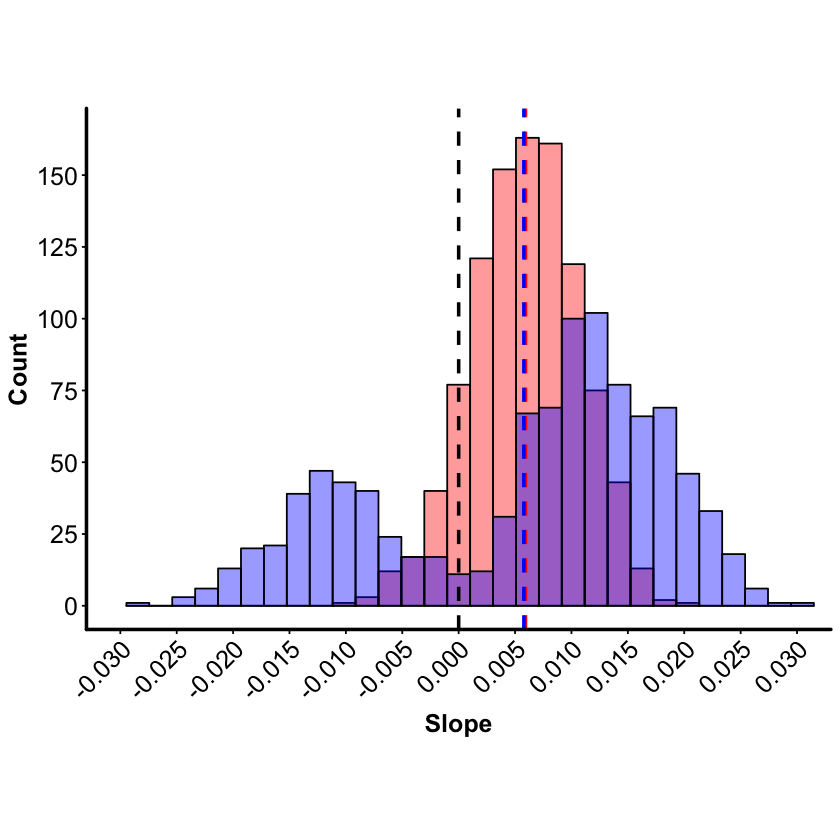

In [131]:
plotDSComp <- ggplot() +
    ylab("Count") + xlab("Slope") + 
    geom_histogram(data = datGradient, aes(x = estimate), bins = 30, fill = "red", alpha = 0.4, colour = "black") +
    geom_histogram(data = datFounder, aes(x = estimate), bins = 30, fill = "blue", alpha = 0.4, colour = "black") +
    geom_vline(data = datGradient, aes(xintercept = mean(estimate)), size = 1, linetype = "dashed", colour = "red") +
    geom_vline(data = datFounder, aes(xintercept = mean(estimate)), size = 1, linetype = "dashed", colour = "blue") +
    geom_vline(xintercept = 0, size = 1, linetype = "dashed", colour = "black") +
    coord_cartesian(xlim = c(-0.03, 0.03), ylim = c(0, 165)) + 
    scale_x_continuous(breaks = seq(from = -0.03, to = 0.03, by = 0.005)) + 
    scale_y_continuous(breaks = seq(from = 0, to = 150, by = 25)) +
    ng1.45
plotDSComp

In [50]:
datSlopes_GenOne

bot,Mig_rate,seq,mean,sd,n,se,ci_mean,prop_sigPos,prop_pos,se_pos,ci_pos,se_sigPos,ci_sigPos,prop_sigNeg,prop_neg,se_neg,ci_neg,se_sigNeg,ci_sigNeg
0.01,0,1,0.0015097593,0.003812674,1000,1.205674e-04,0.0002363120,0.421,0.740,0.01387083,0.02718683,0.01561278,0.03060106,0.176,0.241,0.01352476,0.02650852,0.01204259,0.02360348
0.01,0.01,1,0.0019006516,0.005319009,1000,1.682018e-04,0.0003296756,0.525,0.732,0.01400628,0.02745232,0.01579161,0.03095156,0.186,0.259,0.01385348,0.02715283,0.01230463,0.02411708
0.01,0.05,1,0.0015133136,0.003800515,1000,1.201828e-04,0.0002355584,0.491,0.710,0.01434922,0.02812446,0.01580883,0.03098530,0.171,0.289,0.01433454,0.02809570,0.01190626,0.02333627
0.025,0,1,0.0021174947,0.005482588,1000,1.733747e-04,0.0003398143,0.607,0.748,0.01372938,0.02690959,0.01544510,0.03027239,0.229,0.250,0.01369306,0.02683841,0.01328755,0.02604360
0.025,0.01,1,0.0031450711,0.006605094,1000,2.088714e-04,0.0004093880,0.640,0.753,0.01363785,0.02673019,0.01517893,0.02975071,0.207,0.246,0.01361925,0.02669373,0.01281214,0.02511180
0.025,0.05,1,0.0016008161,0.003587781,1000,1.134556e-04,0.0002223730,0.480,0.707,0.01439274,0.02820977,0.01579873,0.03096552,0.166,0.293,0.01439274,0.02820977,0.01176622,0.02306180
0.035,0,1,0.0025951098,0.006300854,1000,1.992505e-04,0.0003905310,0.665,0.763,0.01344734,0.02635679,0.01492565,0.02925427,0.230,0.237,0.01344734,0.02635679,0.01330789,0.02608347
0.035,0.01,1,0.0034346540,0.006884517,1000,2.177075e-04,0.0004267068,0.656,0.742,0.01383604,0.02711864,0.01502212,0.02944335,0.222,0.257,0.01381850,0.02708426,0.01314215,0.02575861
0.035,0.05,1,0.0016584196,0.003665176,1000,1.159031e-04,0.0002271700,0.494,0.695,0.01455936,0.02853635,0.01581025,0.03098809,0.156,0.305,0.01455936,0.02853635,0.01147449,0.02249001
0.05,0,1,0.0032245158,0.007825902,1000,2.474767e-04,0.0004850544,0.718,0.757,0.01356285,0.02658319,0.01422941,0.02788964,0.240,0.243,0.01356285,0.02658319,0.01350555,0.02647089


In [140]:
path = "~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Git/figures"
#
# MeanSlope_BotMig_NoLeg = MeanSlope_BotMig + theme(legend.position="none")
# PropSigPos_BotMig_NoLeg = PropSigPos_BotMig + theme(legend.position="none")
PropSig_Bot_NoMig_NoLeg = PropSig_Bot_NoMig + theme(legend.position="none")
# propLost_bot_NoMig_NoLeg = propLost_bot_NoMig + theme(legend.position="none")

# NumGen_bot_NoLeg <- NumGen_bot + theme(legend.position="none")
# NumGenK_bot_NoLeg <- NumGenK_bot + theme(legend.position="none")

# ggsave("Figure-5A_MeanSlope_BotMig_NoLeg.pdf", plot = MeanSlope_BotMig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
# ggsave("Figure-6A_propLost_bot_NoMig_NoLeg.pdf", plot = propLost_bot_NoMig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
# ggsave("FreqFirstGen_StrongBot_NoMig.pdf", plot = FreqFirstGen_StrongBot_NoMig, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
# ggsave("FreqFirstGen_InterBot_NoMig.pdf", plot = FreqFirstGen_InterBot_NoMig, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
# ggsave("FreqFirstGen_NoBot_NoMig.pdf", plot = FreqFirstGen_NoBot_NoMig, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("Figure-S3B_PropSig_Bot_NoMig_NoLeg.pdf", plot = PropSig_Bot_NoMig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
# ggsave("Figure-6B_FreqFirstGen_Bot_NoMig.pdf", plot = FreqFirstGen_Bot_NoMig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)

# ggsave("Figure-S2A_NumGen_bot.pdf", plot = NumGen_bot_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
# ggsave("Figure-S2B_NumGenK_bot.pdf", plot = NumGenK_bot_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
# ggsave("Figure-S1_Hist_DSComp.pdf", plot = plotDSComp, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)